### Tokenization

In [4]:
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [5]:
data = "Independence Day is celebrated annually on 15 August as a public holiday in India commemorating the nation's independence from the United Kingdom on 15 August 1947."

In [6]:
print(word_tokenize(data))

['Independence', 'Day', 'is', 'celebrated', 'annually', 'on', '15', 'August', 'as', 'a', 'public', 'holiday', 'in', 'India', 'commemorating', 'the', 'nation', "'s", 'independence', 'from', 'the', 'United', 'Kingdom', 'on', '15', 'August', '1947', '.']


In [7]:
print(sent_tokenize(data))

["Independence Day is celebrated annually on 15 August as a public holiday in India commemorating the nation's independence from the United Kingdom on 15 August 1947."]


### Stemming

In [8]:
from nltk.stem.porter import PorterStemmer

In [9]:
ps = PorterStemmer()

In [10]:
ps.stem('writing')

'write'

In [11]:
ps.stem('babies')

'babi'

### Lemmatization

In [12]:
from nltk.stem import WordNetLemmatizer

In [15]:
lem = WordNetLemmatizer()
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
print(lem.lemmatize('rocks'))

rock


In [17]:
print(lem.lemmatize('babies'))

baby


## Chunking

In [18]:
import nltk
gram = ("NP: {<DT>?<JJ>*<NN>}")

In [19]:
sent = "last night i saw a black dog barking at a kid"

In [20]:
chunking = nltk.RegexpParser(gram)

In [21]:
sent_token = nltk.word_tokenize(sent)

In [23]:
nltk.download('averaged_perceptron_tagger')
tagging = nltk.pos_tag(sent_token)
tagging

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('last', 'JJ'),
 ('night', 'NN'),
 ('i', 'NN'),
 ('saw', 'VBD'),
 ('a', 'DT'),
 ('black', 'JJ'),
 ('dog', 'NN'),
 ('barking', 'NN'),
 ('at', 'IN'),
 ('a', 'DT'),
 ('kid', 'NN')]

In [24]:
sent = "a clever fox was jumping over the wall"

In [25]:
sentence = [("a", "DT"),("clever",
"JJ"),("fox","NN"),("was","VBP"),("jumping","VBP"),("over","IN"),("the","DT"),(
"wall","NN")]

In [26]:
grammar = "NP:{<DT>?<JJ>*<NN>}"

In [27]:
sent_token = nltk.word_tokenize(sent)

In [28]:
parser_chunking=nltk.RegexpParser(grammar)

In [29]:
tagging = nltk.pos_tag(sent_token)
tagging

[('a', 'DT'),
 ('clever', 'NN'),
 ('fox', 'NN'),
 ('was', 'VBD'),
 ('jumping', 'VBG'),
 ('over', 'IN'),
 ('the', 'DT'),
 ('wall', 'NN')]

In [30]:
!pip install svgling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 2.2 MB/s eta 0:00:00


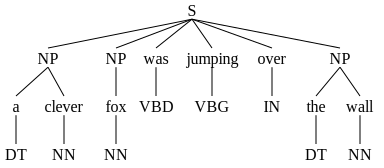

In [31]:
parser_chunking.parse(tagging)


In [32]:
Output_chunk=parser_chunking.parse(tagging)


In [33]:
Output_chunk.draw()

TclError: ignored

## Bag of Words

#### Example 1

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
Sentences=['We are using the Bag of Word model', 'Bag of Word model is used for extracting the features.']

In [36]:
vectorizer_count = CountVectorizer()
features_text = vectorizer_count.fit_transform(Sentences).todense()
print(vectorizer_count.vocabulary_)

{'we': 11, 'are': 0, 'using': 10, 'the': 8, 'bag': 1, 'of': 7, 'word': 12, 'model': 6, 'is': 5, 'used': 9, 'for': 4, 'extracting': 2, 'features': 3}


In [37]:
print("\nDimensions of training data:", features_text.shape)


Dimensions of training data: (2, 13)


#### Example 2

For example, we want to predict whether
a given sentence belongs to the category email, news, sports, computer, etc. In the
following example, we are going to use tf-idf to formulate a feature vector to find the
category of documents. We will use the data from **20 newsgroup dataset of sklearn**.


In [38]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
#Define the category map. We are using five different categories named Religion, Autos,Sports, Electronics and Space.

category_map = {'talk.religion.misc': 'Religion', 'rec.autos':
'Autos','rec.sport.hockey':'Hockey','sci.electronics':'Electronics',
'sci.space': 'Space'}

In [40]:
#Create the training set
training_data = fetch_20newsgroups(subset='train', categories=category_map.keys(), shuffle=True, random_state=5)

In [41]:
training_data

{'data': ["From: dtmedin@catbyte.b30.ingr.com (Dave Medin)\nSubject: TDR plug-in\nReply-To: dtmedin@catbyte.b30.ingr.com\nOrganization: Intergraph Corporation, Huntsville AL\nLines: 18\n\nI have an HP 1815 TDR plug-in for an HP180 series scope or mainframe\nthat I'm never going to use (no scope any more). If you're interested\nin it, please let me know. Price? Probably real cheap.\n\nThis notice may have appeared once before. I posted, and it never showed\nup on our local server...\n\n-- \n--------------------------------------------------------------------\n       Dave Medin\t\t\tPhone:\t(205) 730-3169 (w)\n    SSD--Networking\t\t\t\t(205) 837-1174 (h)\n    Intergraph Corp.\n       M/S GD3004 \t\tInternet: dtmedin@catbyte.b30.ingr.com\n  Huntsville, AL 35894\t\tUUCP:  ...uunet!ingr!b30!catbyte!dtmedin\n\n   ******* Everywhere You Look (at least around my office) *******\n\n * The opinions expressed here are mine (or those of my machine)\n",
  'From: shanlps@ducvax.auburn.edu\nSubject:

In [42]:
#Build a count vectorizer and extract the term counts:
vectorizer_count = CountVectorizer()
train_tc = vectorizer_count.fit_transform(training_data.data)
print("\nDimensions of training data:", train_tc.shape)



Dimensions of training data: (2755, 39297)


In [43]:
#The tf-idf transformer is created as follows:
tfidf = TfidfTransformer()
train_tfidf = tfidf.fit_transform(train_tc)


In [44]:
#Now, define the test data:
input_data = [
'Discovery was a space shuttle',
'Hindu, Christian, Sikh all are religions',
'We must have to drive safely',
'Puck is a disk made of rubber',
'Television, Microwave, Refrigrator all uses electricity'
]

In [45]:
#The above data will help us train a Multinomial Naive Bayes classifier:
classifier = MultinomialNB().fit(train_tfidf, training_data.target)


In [46]:
#Transform the input data using the count vectorizer:
input_tc = vectorizer_count.transform(input_data)


In [47]:
#Now, we will transform the vectorized data using the tfidf transformer:
input_tfidf = tfidf.transform(input_tc)

In [48]:
#We will predict the output categories:
predictions = classifier.predict(input_tfidf)

In [49]:
#The output is generated as follows:

for sent, category in zip(input_data, predictions):
    print('\nInput Data:', sent, '\n Category:', \
    category_map[training_data.target_names[category]])


Input Data: Discovery was a space shuttle 
 Category: Space

Input Data: Hindu, Christian, Sikh all are religions 
 Category: Religion

Input Data: We must have to drive safely 
 Category: Autos

Input Data: Puck is a disk made of rubber 
 Category: Hockey

Input Data: Television, Microwave, Refrigrator all uses electricity 
 Category: Electronics


## Gender Finder

In this problem statement, a classifier would be trained to find the gender (male or female)
by providing the names. We need to use a heuristic to construct a feature vector and train the classifier. We will be using the labeled data from the scikit-learn package. Following is the Python code to build a gender finder:


In [50]:
import random
from nltk import NaiveBayesClassifier
from nltk.classify import accuracy as nltk_accuracy
from nltk.corpus import names

For this example, we’ll start by just looking at the final letter of a given name.

In [51]:
#Now we need to extract the last N letters from the input word. These letters will act as features:
def extract_features(word, N=2):
    last_n_letters = word[-N:]
    return {'feature': last_n_letters.lower()}

In [53]:
nltk.download('names')
male_list = [(name, 'male') for name in names.words('male.txt')]

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Unzipping corpora/names.zip.


In [ ]:
nltk.download('names')

[nltk_data] Downloading package names to C:\Users\Leena
[nltk_data]     Ali\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!


True

In [54]:
female_list = [(name, 'female') for name in names.words('female.txt')]

In [55]:
male_list

[('Aamir', 'male'),
 ('Aaron', 'male'),
 ('Abbey', 'male'),
 ('Abbie', 'male'),
 ('Abbot', 'male'),
 ('Abbott', 'male'),
 ('Abby', 'male'),
 ('Abdel', 'male'),
 ('Abdul', 'male'),
 ('Abdulkarim', 'male'),
 ('Abdullah', 'male'),
 ('Abe', 'male'),
 ('Abel', 'male'),
 ('Abelard', 'male'),
 ('Abner', 'male'),
 ('Abraham', 'male'),
 ('Abram', 'male'),
 ('Ace', 'male'),
 ('Adair', 'male'),
 ('Adam', 'male'),
 ('Adams', 'male'),
 ('Addie', 'male'),
 ('Adger', 'male'),
 ('Aditya', 'male'),
 ('Adlai', 'male'),
 ('Adnan', 'male'),
 ('Adolf', 'male'),
 ('Adolfo', 'male'),
 ('Adolph', 'male'),
 ('Adolphe', 'male'),
 ('Adolpho', 'male'),
 ('Adolphus', 'male'),
 ('Adrian', 'male'),
 ('Adrick', 'male'),
 ('Adrien', 'male'),
 ('Agamemnon', 'male'),
 ('Aguinaldo', 'male'),
 ('Aguste', 'male'),
 ('Agustin', 'male'),
 ('Aharon', 'male'),
 ('Ahmad', 'male'),
 ('Ahmed', 'male'),
 ('Ahmet', 'male'),
 ('Ajai', 'male'),
 ('Ajay', 'male'),
 ('Al', 'male'),
 ('Alaa', 'male'),
 ('Alain', 'male'),
 ('Alan', 'male

In [56]:
female_list

[('Abagael', 'female'),
 ('Abagail', 'female'),
 ('Abbe', 'female'),
 ('Abbey', 'female'),
 ('Abbi', 'female'),
 ('Abbie', 'female'),
 ('Abby', 'female'),
 ('Abigael', 'female'),
 ('Abigail', 'female'),
 ('Abigale', 'female'),
 ('Abra', 'female'),
 ('Acacia', 'female'),
 ('Ada', 'female'),
 ('Adah', 'female'),
 ('Adaline', 'female'),
 ('Adara', 'female'),
 ('Addie', 'female'),
 ('Addis', 'female'),
 ('Adel', 'female'),
 ('Adela', 'female'),
 ('Adelaide', 'female'),
 ('Adele', 'female'),
 ('Adelice', 'female'),
 ('Adelina', 'female'),
 ('Adelind', 'female'),
 ('Adeline', 'female'),
 ('Adella', 'female'),
 ('Adelle', 'female'),
 ('Adena', 'female'),
 ('Adey', 'female'),
 ('Adi', 'female'),
 ('Adiana', 'female'),
 ('Adina', 'female'),
 ('Adora', 'female'),
 ('Adore', 'female'),
 ('Adoree', 'female'),
 ('Adorne', 'female'),
 ('Adrea', 'female'),
 ('Adria', 'female'),
 ('Adriaens', 'female'),
 ('Adrian', 'female'),
 ('Adriana', 'female'),
 ('Adriane', 'female'),
 ('Adrianna', 'female'),
 ('

In [57]:
data = (male_list + female_list)
random.seed(5)
random.shuffle(data)

In [58]:
data

[('Dasi', 'female'),
 ('Marius', 'male'),
 ('Marlene', 'female'),
 ('Margaret', 'female'),
 ('Nickie', 'female'),
 ('Lovell', 'male'),
 ('Jermaine', 'male'),
 ('Sonja', 'female'),
 ('Mayer', 'male'),
 ('Ed', 'male'),
 ('Daffy', 'female'),
 ('Tamra', 'female'),
 ('Benson', 'male'),
 ('Bertrand', 'male'),
 ('Luelle', 'female'),
 ('Gigi', 'female'),
 ('Nilson', 'male'),
 ('Golda', 'female'),
 ('Donica', 'female'),
 ('Juliana', 'female'),
 ('Laurens', 'male'),
 ('Ange', 'female'),
 ('Moises', 'male'),
 ('Melisa', 'female'),
 ('Emmie', 'female'),
 ('Nitin', 'female'),
 ('Rivkah', 'female'),
 ('Tyson', 'male'),
 ('Fianna', 'female'),
 ('Gustave', 'male'),
 ('Byron', 'male'),
 ('Harvard', 'male'),
 ('Lyssa', 'female'),
 ('Bunni', 'female'),
 ('Guglielma', 'female'),
 ('Tami', 'female'),
 ('Genevieve', 'female'),
 ('Devan', 'female'),
 ('Kiele', 'female'),
 ('Godfrey', 'male'),
 ('Cathryn', 'female'),
 ('Eunice', 'female'),
 ('Maurise', 'female'),
 ('Estele', 'female'),
 ('Phillip', 'male'),
 

In [59]:
#Now, test data will be created as follows:
namesInput = ['rakesh', 'salman', 'sumithra', 'haleema']

In [60]:
#Define the number of samples used for train and test with the following code
train_sample = int(0.8 * len(data))

In [61]:
for i in range(1, 6):
        print('\nNumber of end letters:', i)
        features = [(extract_features(n, i), gender) for (n, gender) in data]
        train_data, test_data = features[:train_sample], features[train_sample:]
        classifier = NaiveBayesClassifier.train(train_data)
        #The accuracy of the classifier can be computed as follows:
        accuracy_classifier = round(100 * nltk_accuracy(classifier, test_data), 2)
        print('Accuracy = ' + str(accuracy_classifier) + '%')
        #Now, we can predict the output:
        for name in namesInput:
            print(name, '==>', classifier.classify(extract_features(name, i)))


Number of end letters: 1
Accuracy = 74.7%
rakesh ==> female
salman ==> male
sumithra ==> female
haleema ==> female

Number of end letters: 2
Accuracy = 78.79%
rakesh ==> male
salman ==> male
sumithra ==> female
haleema ==> female

Number of end letters: 3
Accuracy = 77.22%
rakesh ==> male
salman ==> male
sumithra ==> female
haleema ==> female

Number of end letters: 4
Accuracy = 69.98%
rakesh ==> female
salman ==> male
sumithra ==> female
haleema ==> female

Number of end letters: 5
Accuracy = 64.63%
rakesh ==> female
salman ==> male
sumithra ==> female
haleema ==> female


In the above output, we can see that accuracy in maximum number of end letters are two
and it is decreasing as the number of end letters are increasing.

In [62]:
train_sample = int(0.8 * len(data))

In [63]:
train_sample

6355

In [64]:
train_data

[({'feature': 'dasi'}, 'female'),
 ({'feature': 'arius'}, 'male'),
 ({'feature': 'rlene'}, 'female'),
 ({'feature': 'garet'}, 'female'),
 ({'feature': 'ickie'}, 'female'),
 ({'feature': 'ovell'}, 'male'),
 ({'feature': 'maine'}, 'male'),
 ({'feature': 'sonja'}, 'female'),
 ({'feature': 'mayer'}, 'male'),
 ({'feature': 'ed'}, 'male'),
 ({'feature': 'daffy'}, 'female'),
 ({'feature': 'tamra'}, 'female'),
 ({'feature': 'enson'}, 'male'),
 ({'feature': 'trand'}, 'male'),
 ({'feature': 'uelle'}, 'female'),
 ({'feature': 'gigi'}, 'female'),
 ({'feature': 'ilson'}, 'male'),
 ({'feature': 'golda'}, 'female'),
 ({'feature': 'onica'}, 'female'),
 ({'feature': 'liana'}, 'female'),
 ({'feature': 'urens'}, 'male'),
 ({'feature': 'ange'}, 'female'),
 ({'feature': 'oises'}, 'male'),
 ({'feature': 'elisa'}, 'female'),
 ({'feature': 'emmie'}, 'female'),
 ({'feature': 'nitin'}, 'female'),
 ({'feature': 'ivkah'}, 'female'),
 ({'feature': 'tyson'}, 'male'),
 ({'feature': 'ianna'}, 'female'),
 ({'feature':